In [2]:
import os
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_dir = "krylov_ratio_copy"
all_files = os.listdir(data_dir)
assert "hubbard_exact_3.hdf5" in all_files
merged_files = [f for f in all_files if "merged" in f]
print(len(merged_files))

11


In [6]:
# Get the exact energy.
f_exact = h5py.File(data_dir + "/hubbard_exact_3.hdf5", "r")
energy_exact = np.min(f_exact["energies"])
print(f"Exact energy is {energy_exact}.")
f_exact.close()

Exact energy is (1.0717967697244912+0j).


In [8]:
dfs = []
for merged_f in merged_files:
    fname = data_dir + "/" + merged_f
    # Get the number of steps.
    f = h5py.File(fname, "r")
    steps = f["steps"][()]
    ratio = f["ratio"][()]
    f.close()
    # Get the upper bound.
    # fname2 = fname.replace("eigenvalues", "bound")
    # bound_df = pd.read_hdf(fname2)
    # Get the dataframe with energy vs. d
    df = pd.read_hdf(fname, key="eigenvalues")
    df["error"] = abs(df["energy"] - energy_exact) / abs(energy_exact)
    df["steps"] = steps
    df["ratio"] = ratio
    df.set_index("d")
    # df_concat = pd.concat([df, bound_df], axis=1)
    # dfs.append(df_concat)
    dfs.append(df)
df_total = pd.concat(dfs)
print(df_total["ratio"])

i
0     0.55
1     0.55
2     0.55
3     0.55
4     0.55
      ... 
9     0.85
10    0.85
11    0.85
12    0.85
13    0.85
Name: ratio, Length: 154, dtype: float64


In [5]:
df_small = df_total[df_total["d"] >= 20]
print(df_small)

Empty DataFrame
Columns: [d, eps, energy, num_pos, error, steps]
Index: []


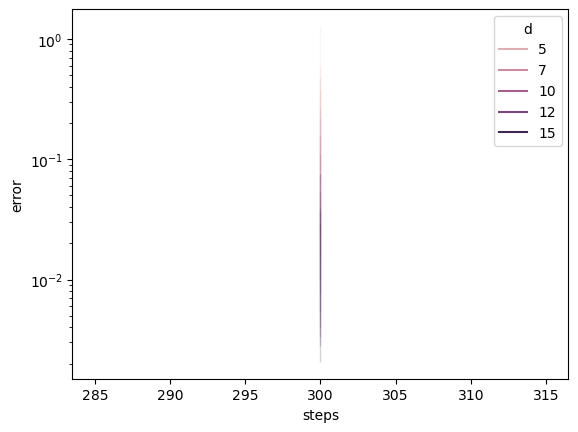

In [6]:
fig, ax = plt.subplots()
ax.set_yscale("log")
sns.lineplot(ax=ax, data=df_total, x="steps", y="error", hue="d")
plt.show()